**To prioritize high-value listings, a real estate firm wants to predict whether a house falls
in the "High" or "Low" price category. Build a Random Forest classifier to perform binary
classification based on the house’s feature**s.

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
df = pd.read_csv('real_estate.csv')

In [76]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price_category
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,1


In [45]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [47]:
print("\nColumn types:\n", df.dtypes)


Column types:
 CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [49]:
median_price = df['MEDV'].median()
df['price_category'] = df['MEDV'].apply(lambda x: 1 if x > median_price else 0)

In [51]:
# Drop original MEDV column (since we're using the binary version)
df.drop('MEDV', axis=1, inplace=True)

In [53]:
X = df.drop('price_category', axis=1)
y = df['price_category']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [61]:
y_pred = rf.predict(X_test)

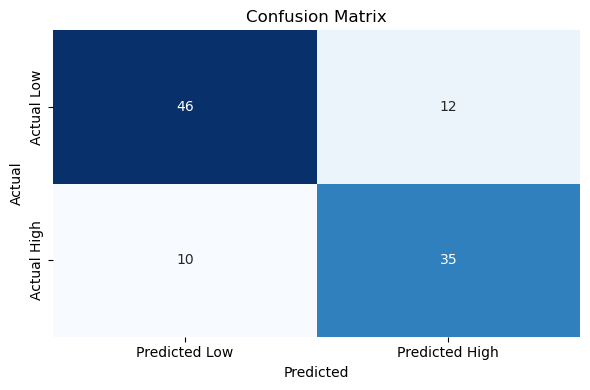

In [67]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [69]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81        58
           1       0.74      0.78      0.76        45

    accuracy                           0.79       103
   macro avg       0.78      0.79      0.78       103
weighted avg       0.79      0.79      0.79       103



In [71]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.7864077669902912


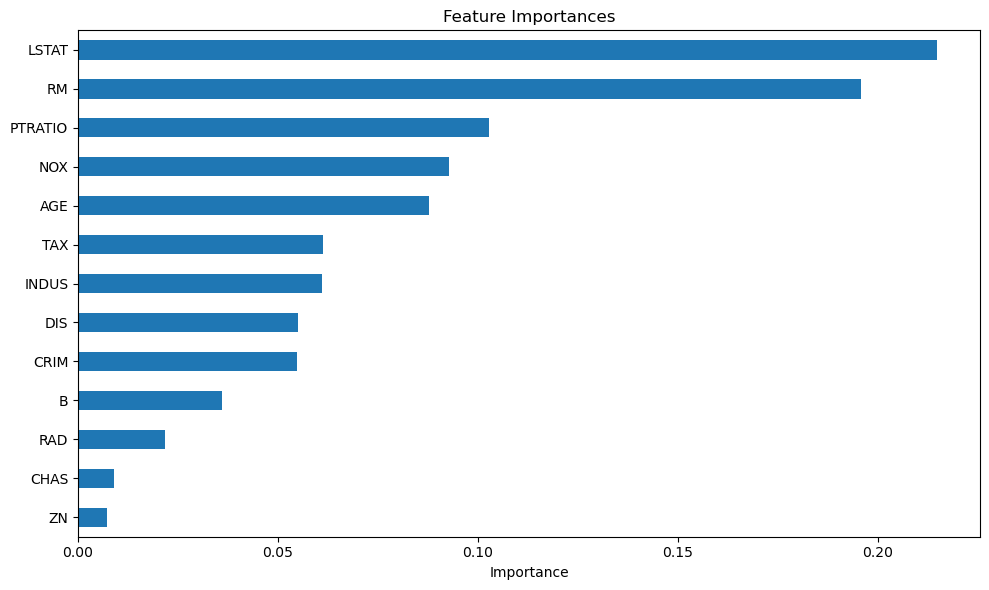

In [73]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), title='Feature Importances')
plt.xlabel("Importance")
plt.tight_layout()
plt.show()